# Préparation des images

In [36]:
IMAGE_SIZE = (64,64)
MAX_IMAGES = 1000
NB_CLUSTERS = 10

In [37]:
from PIL import Image
import os
import numpy as np
import pandas as pd
import random

def load_images_into_array(folder_path, max_images=100, image_size=(64, 64)):
    images = []
    i = 0
    for filename in os.listdir(folder_path):
        if(i >= max_images):
            break

        file_path = os.path.join(folder_path, filename)
        
        try:
            # Charger l'image et la redimensionner
            img = Image.open(file_path).convert('RGB')
            img = img.resize(image_size)
            # normaliser les valeurs de pixels de 0 à 1 au lieu de 0 à 255
            img = np.array(img).astype('float32') / 255
            img_array = np.array(img)
            # Ajouter l'image à la liste
            images.append(img_array.flatten())
        except Exception as e:
            print(f"Erreur lors du traitement de l'image {file_path}: {str(e)}")
            print(e)
        
        i += 1

    return images

# Spécifiez le chemin du dossier contenant vos images
dataset_folder_path = "./fruits/"

# Chargez les images dans un format adapté à scikit-learn
images = load_images_into_array(dataset_folder_path,max_images=MAX_IMAGES,image_size=IMAGE_SIZE)


In [38]:
def augment_image(images):
    res = []
    for img in images:
        res.append(img)
        # flip
        img_pillow_array = img.astype('float32') * 255
        img_pillow_array = img_pillow_array.astype('uint8')
        img_pillow = Image.fromarray(img_pillow_array.reshape(IMAGE_SIZE[0],IMAGE_SIZE[1],3)).convert('RGB')
        im_flip = img_pillow.transpose(Image.FLIP_TOP_BOTTOM)
        im_flip = np.array(im_flip).flatten() /255
        # rotate 90 degrees
        im_rotate = img_pillow.rotate(90)
        im_rotate = np.array(im_rotate).flatten() /255

        # flip horizontal
        im_flip = img_pillow.transpose(Image.FLIP_LEFT_RIGHT)
        im_flip = np.array(im_flip).flatten() /255

        res.append(im_rotate)
        res.append(im_rotate)
        res.append(im_flip)

    return res

# Augmentation du jeu de données (make everything very slow)
images = augment_image(images)
df = pd.DataFrame(data=images)


# 5. Application de K-Means

In [39]:
# Appliquez l’algorithme K-Means sur les images prétraitées et augmentées
# pour regrouper les fruits en clusters. Choisissez un nombre de clusters K
# approprié. Vous pouvez expérimenter avec différentes valeurs de K

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Créez un objet K-Means avec 5 clusters
kmeans = KMeans(n_clusters=NB_CLUSTERS, random_state=0)

kmeans.fit(df)

c:\Users\hrey2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=0)

In [40]:
from matplotlib import pyplot as plt

preds = kmeans.predict(df)

In [41]:
print("innertie is : ", kmeans.inertia_)
print("silhouette_score is: ", silhouette_score(df, preds, metric='euclidean'))
print("davies_bouldin_score is: ", davies_bouldin_score(df, preds))


innertie is :  2566448.578859016
silhouette_score is:  0.04944132881642325
davies_bouldin_score is:  3.4130236847340014


C:\Users\hrey2\AppData\Local\Temp\ipykernel_10232\1487501791.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


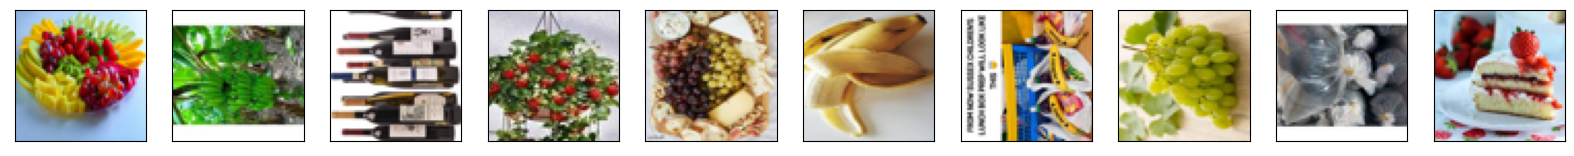

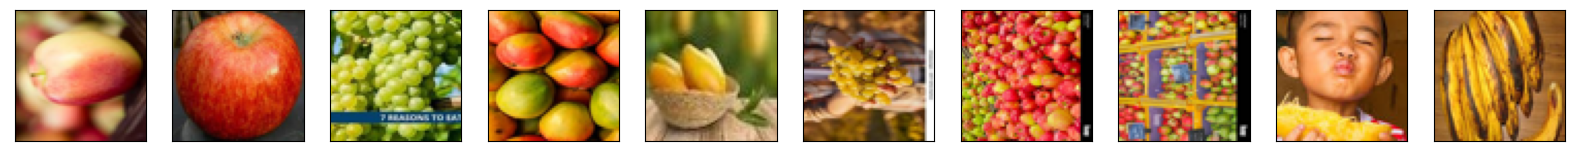

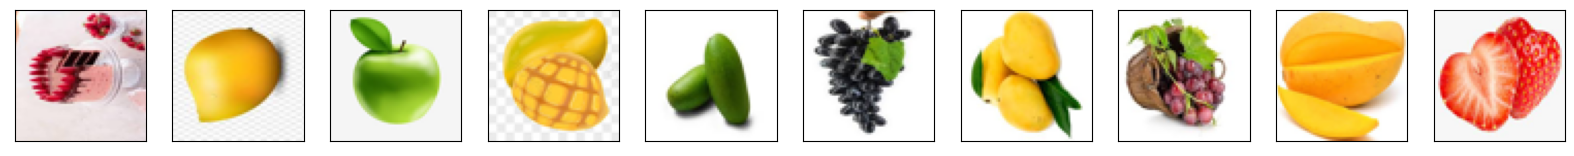

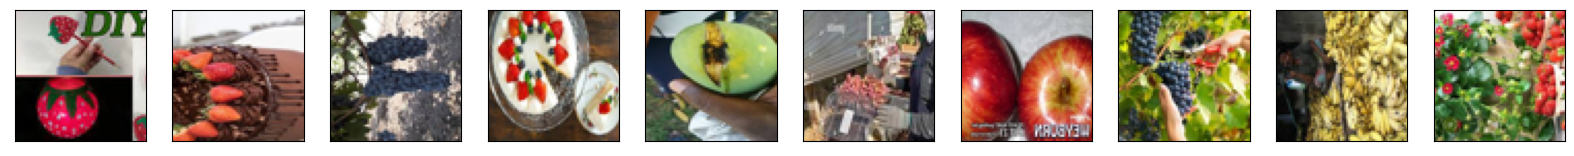

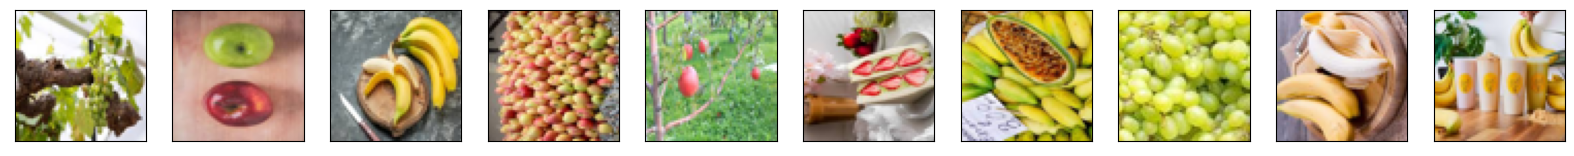

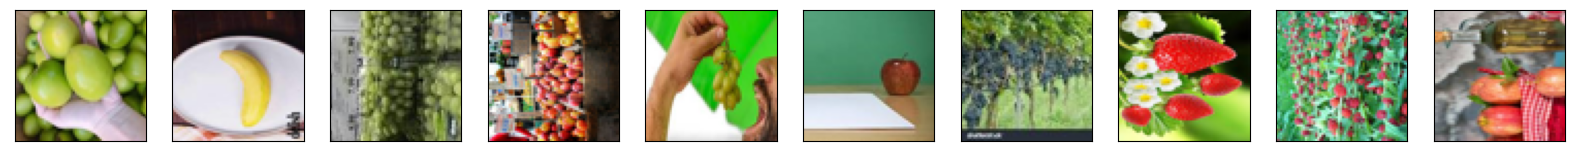

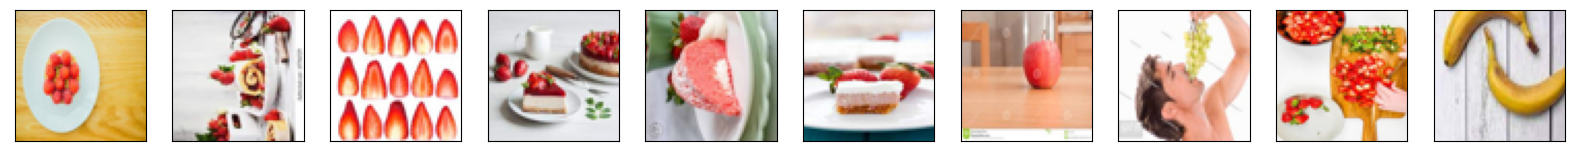

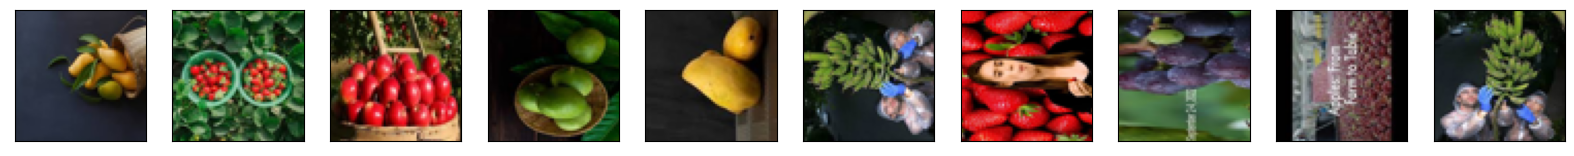

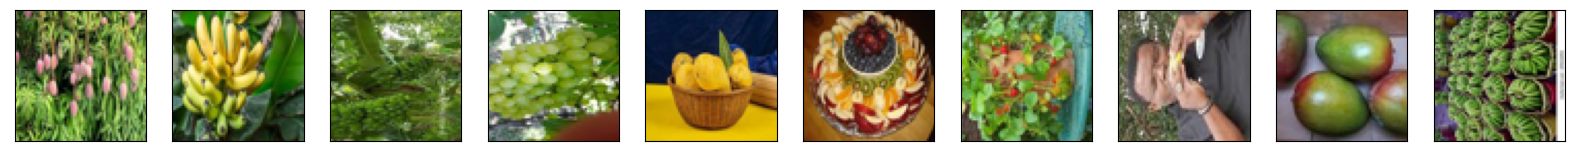

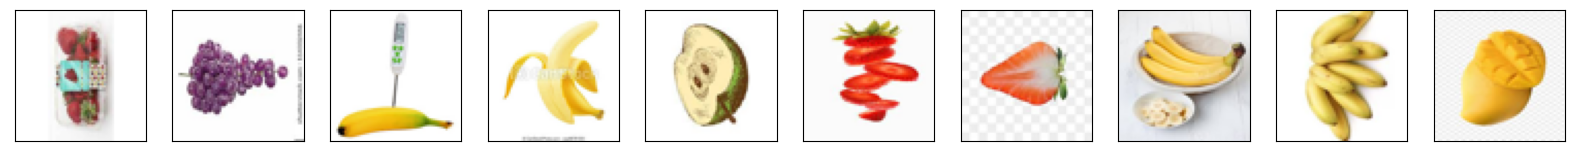

In [42]:
columns = 10
rows = NB_CLUSTERS


for i in range(0,rows):
    fig = plt.figure(figsize=(20, 40))
    errors =0
    imgs_in_cluster = df.iloc[kmeans.labels_ == i]
    for j in range(0, columns):
        try:
            random_img = random.randint(0,imgs_in_cluster.shape[0])
            img = imgs_in_cluster.iloc[random_img].values
            img = img.reshape((IMAGE_SIZE[0],IMAGE_SIZE[1],3))
            img = Image.fromarray((img * 255).astype(np.uint8))
            fig.add_subplot(rows, columns, (i*columns)+j+1, xticks=[], yticks=[])
            plt.imshow(img)
        except:
            print("no more image in cluster " + str(i))
            errors += 1
    if(errors < 3):
        fig.show()


